**Student Performance Indicator**


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [7]:
df=pd.read_csv("data\\stud.csv")


In [8]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df.shape

(1000, 8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [15]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

**EXPLORING DATA**

In [23]:
print('\n')

print('Categories in gender variable ')
print(df['gender'].unique())
print('\n')

print('Categories in race\ehtnicity variable ')
print(df['race_ethnicity'].unique())
print('\n')

print('Categories in parental level of education variable ')
print(df['parental_level_of_education'].unique())
print('\n')

print('Categories in test preparation course variable ')
print(df['test_preparation_course'].unique())
print('\n')
print('Categories in lunch variable ')
print(df['lunch'].unique())



Categories in gender variable 
['female' 'male']


Categories in race\ehtnicity variable 
['group B' 'group C' 'group A' 'group D' 'group E']


Categories in parental level of education variable 
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


Categories in test preparation course variable 
['none' 'completed']


Categories in lunch variable 
['standard' 'free/reduced']


Define numerical and categorical data

In [25]:
numeric_features=[f for f in df.columns if df[f].dtype!='O']
categorical_features=[f for f in df.columns if df[f].dtype =='O']

In [26]:
numeric_features

['math_score', 'reading_score', 'writing_score']

In [27]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

ADD total score and average column

In [30]:
df['total_score']=df['math_score']+df['writing_score']+df['reading_score']
df['average_score']=df['total_score']/3

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [32]:
reading_full=df[df['reading_score']==100]['average_score'].count()
writing_full=df[df['writing_score']==100]['average_score'].count()
math_full=df[df['math_score']==100]['average_score'].count()

print(f"No of students with full marks in maths {math_full}")
print(f"No of students with full marks in reading {reading_full}")
print(f"No of students with full marks in writing {writing_full}")


No of students with full marks in maths 7
No of students with full marks in reading 17
No of students with full marks in writing 14


In [33]:
reading_less_20=df[df['reading_score']<=20]['average_score'].count()
writing_less_20=df[df['writing_score']<=20]['average_score'].count()
math_less_20=df[df['math_score']<=20]['average_score'].count()

print(f"No of students with less than 20 marks in maths {math_less_20}")
print(f"No of students with less than 20 marks in reading {reading_less_20}")
print(f"No of students with less than 20 marks in writing {writing_less_20}")


No of students with less than 20 marks in maths 4
No of students with less than 20 marks in reading 1
No of students with less than 20 marks in writing 3


**EDA**

**Exploratory Data Analysis**

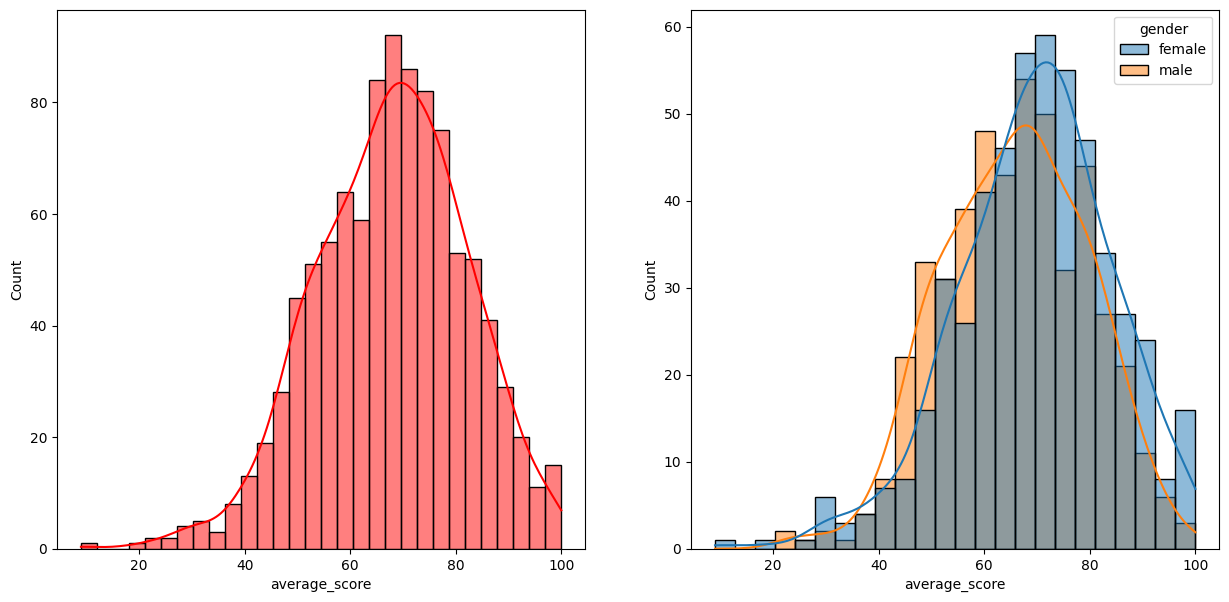

In [42]:
import matplotlib.pyplot as plt
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()


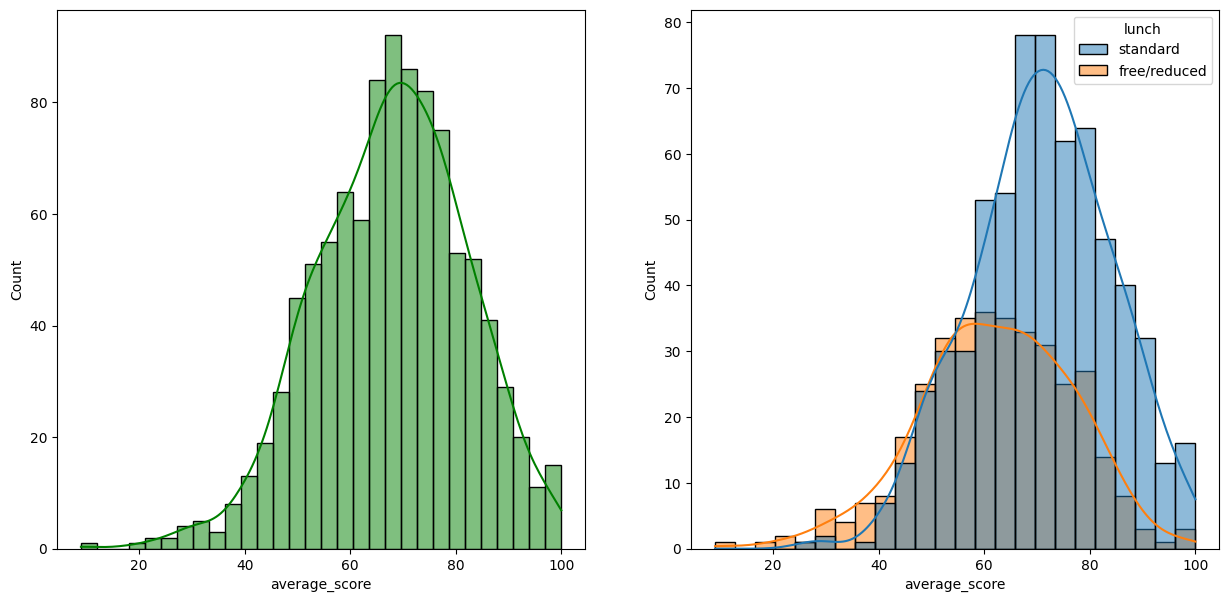

In [47]:
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.show()

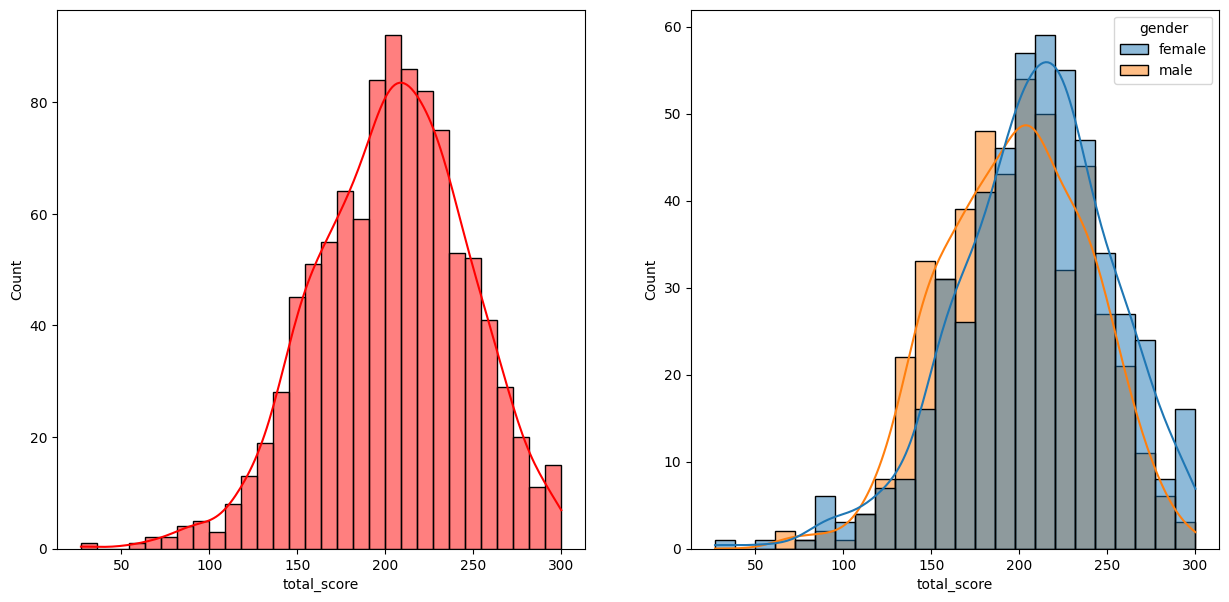

In [45]:
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

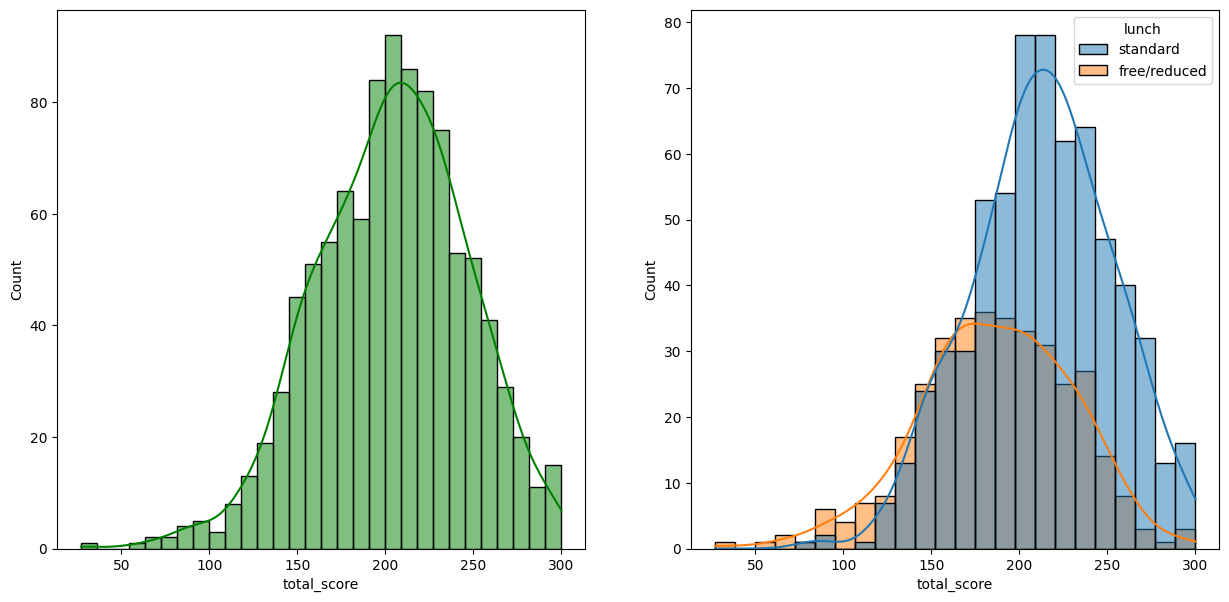

In [46]:
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='lunch')
plt.show()

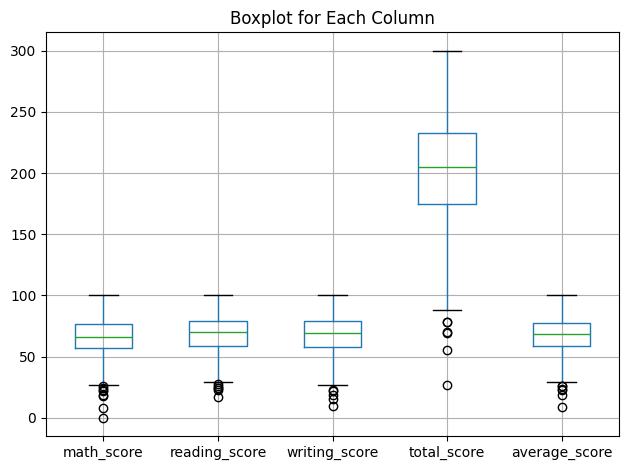

In [55]:
plt.title("Boxplot for Each Column")
df_num=df.select_dtypes(include='number')
df_num.boxplot()
plt.tight_layout()
plt.show()

In [60]:
df_corr=df[numeric_features]
corr=df_corr.corr()

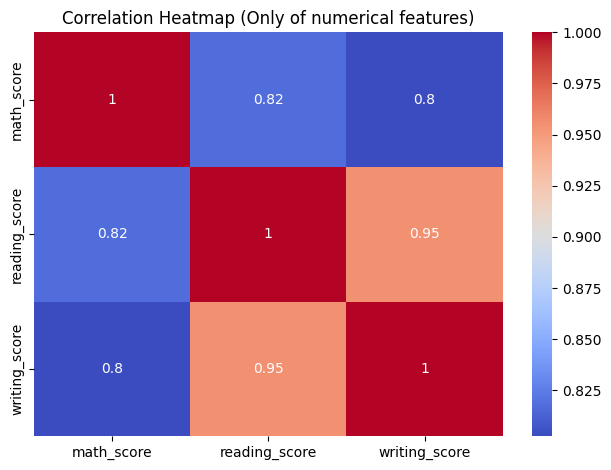

In [64]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Only of numerical features)")
plt.tight_layout()
plt.show()


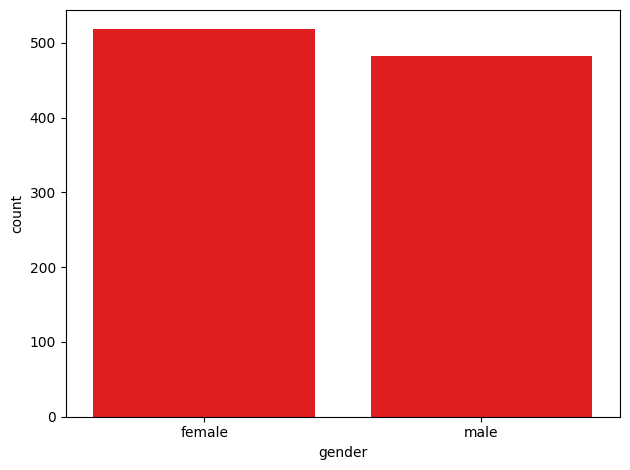

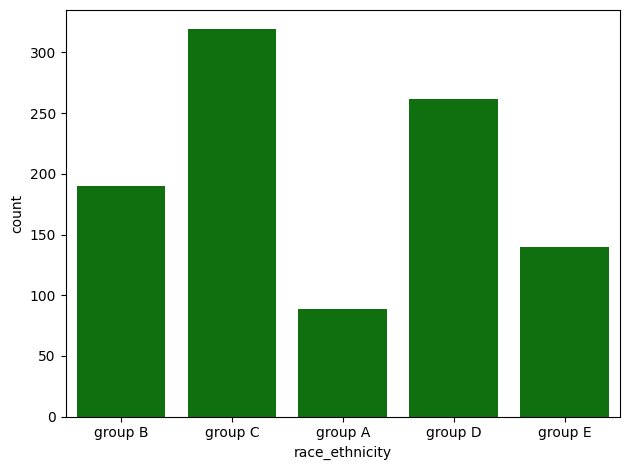

In [77]:
sns.countplot(x='gender',data=df,color='r')
plt.tight_layout()
plt.show()
sns.countplot(x='race_ethnicity', data=df,color='g')
plt.tight_layout()
plt.show()
